## Purpose

To compute the ML performance of the proposed method in near real-time.

In [1]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

## All Attack Files by Correlation Method

In [2]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_correlation_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json']


## Filtering Files Per Attacks File

In [3]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

dfs_correlated = []
dfs_max_engine = []
dfs_max_speedometer = []
dfs_rev_light_off = []
dfs_rev_light_on = []

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index
    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows


    if "correlated" in file:
        dfs_correlated.append(df_rocauc)

    if "max_engine" in file:
        dfs_max_engine.append(df_rocauc)

    if "speedometer" in file:
        dfs_max_speedometer.append(df_rocauc)

    if "reverse_light_off" in file:
        dfs_rev_light_off.append(df_rocauc)

    if "reverse_light_on" in file:
        dfs_rev_light_on.append(df_rocauc)

results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json
results_correlated_signal_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json
results_max_speedometer_attack_3_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json
results_max_speedometer_attack_1_masquerade_correlation_ROAD.json
results_correlated_signal_attack_1_masquerade_correlation_ROAD.json
results_correlated_signal_attack_3_masquerade_correlation_ROAD.json
results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json
results_max_speedometer_attack_2_masquerade_correlation_ROAD.json
results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json


## Average Correlated Attack

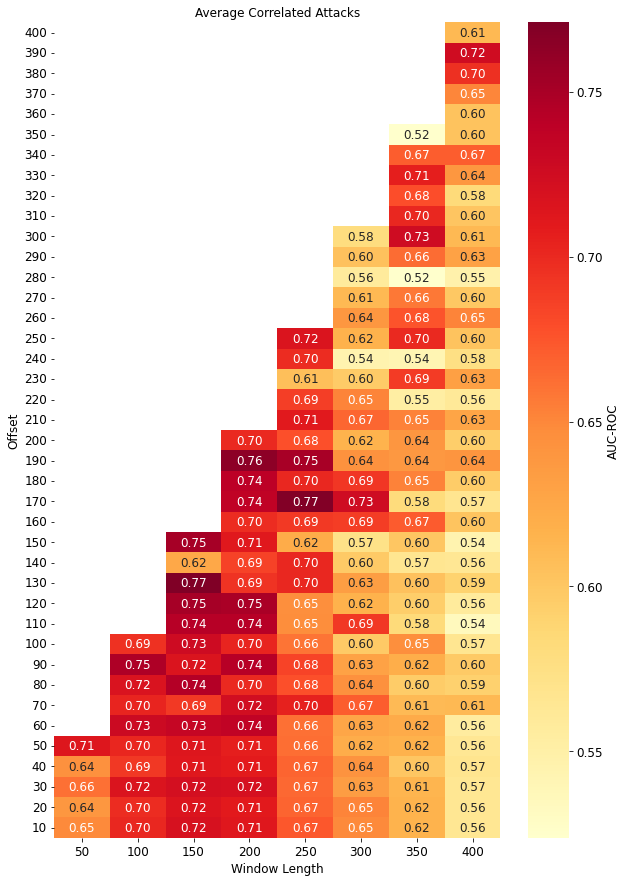

In [5]:
df_to_inspect = dfs_correlated
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Correlated Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## Average Max Engine Attack

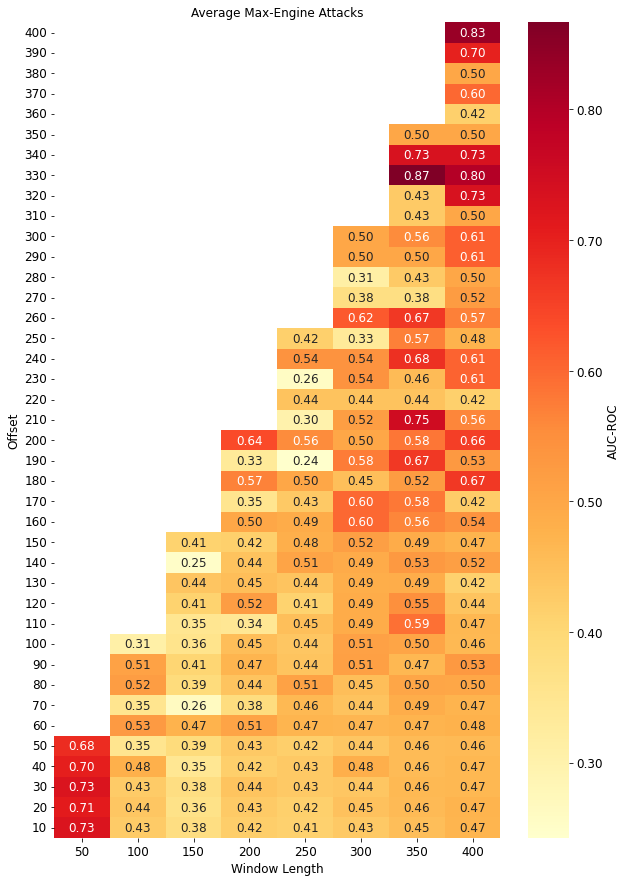

In [7]:
df_to_inspect = dfs_max_engine
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Max-Engine Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## Average Max Speedometer Attack

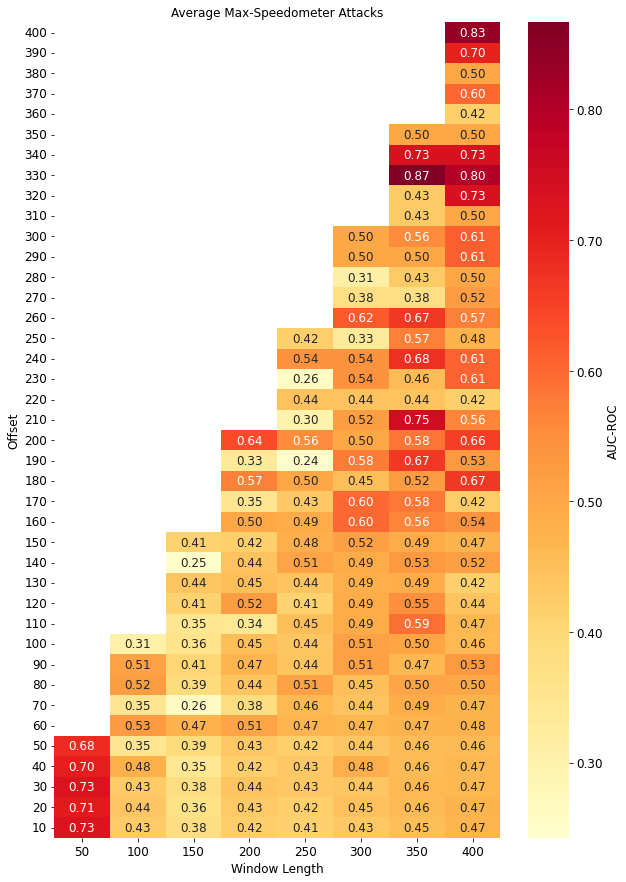

In [8]:
df_to_inspect = dfs_max_engine
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Max-Speedometer Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## Average Reverse Light Off Attack

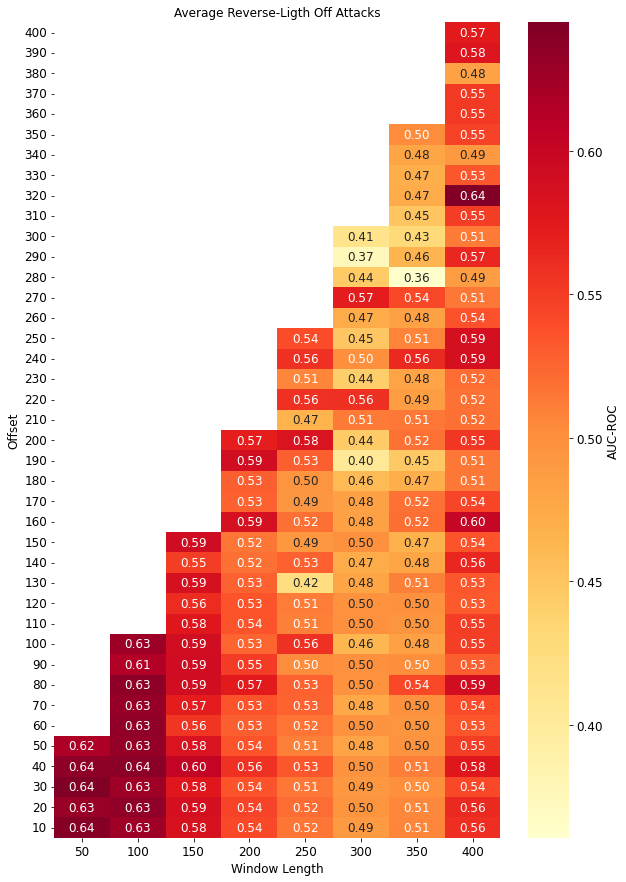

In [10]:
df_to_inspect = dfs_rev_light_off
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Reverse-Ligth Off Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## Average Reverse Light On Attack

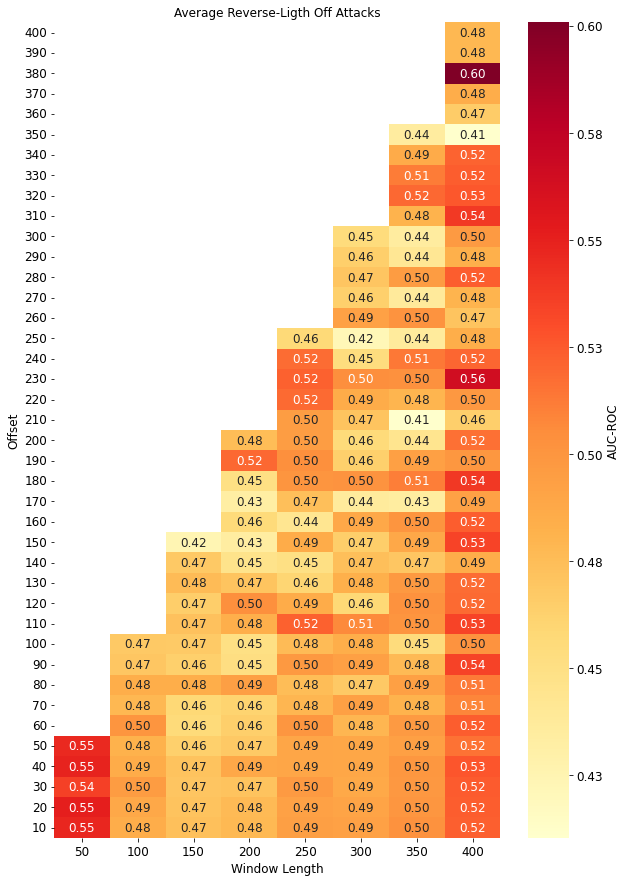

In [11]:
df_to_inspect = dfs_rev_light_on
df_rocauc_avg = pd.DataFrame(np.array([df.to_numpy() for df in df_to_inspect]).mean(axis=0), index=df_to_inspect[0].index, columns=df_to_inspect[0].columns)

fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc_avg, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
    annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title("Average Reverse-Ligth Off Attacks", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by DBSCAN Method

In [12]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_DBSCAN_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json']


results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json


results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json
results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json
results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json
results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json
results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json
results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json
results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json


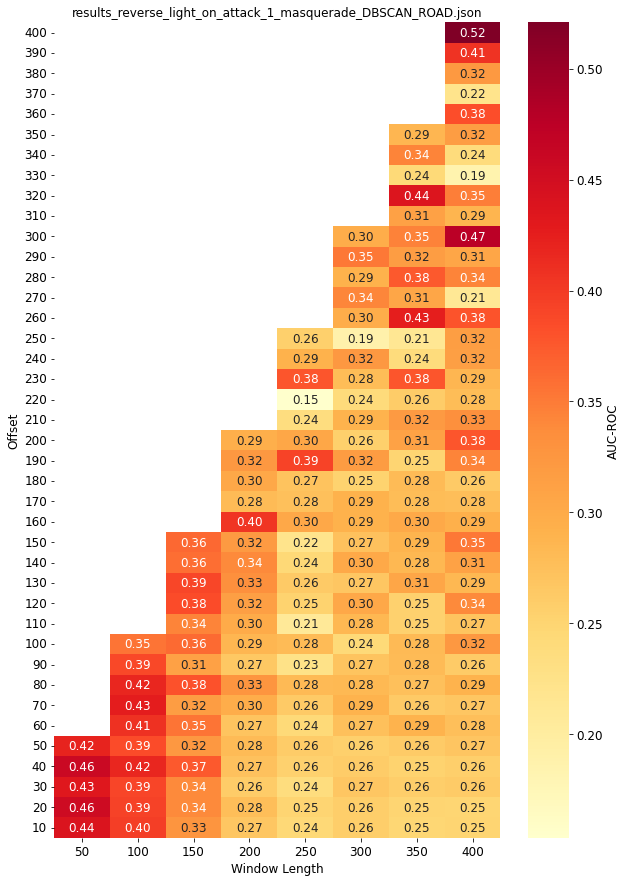

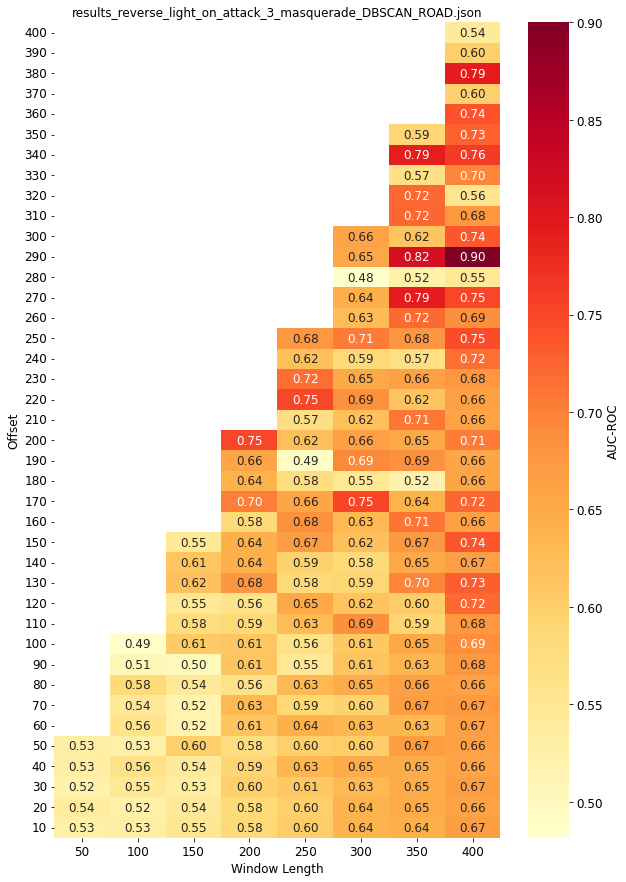

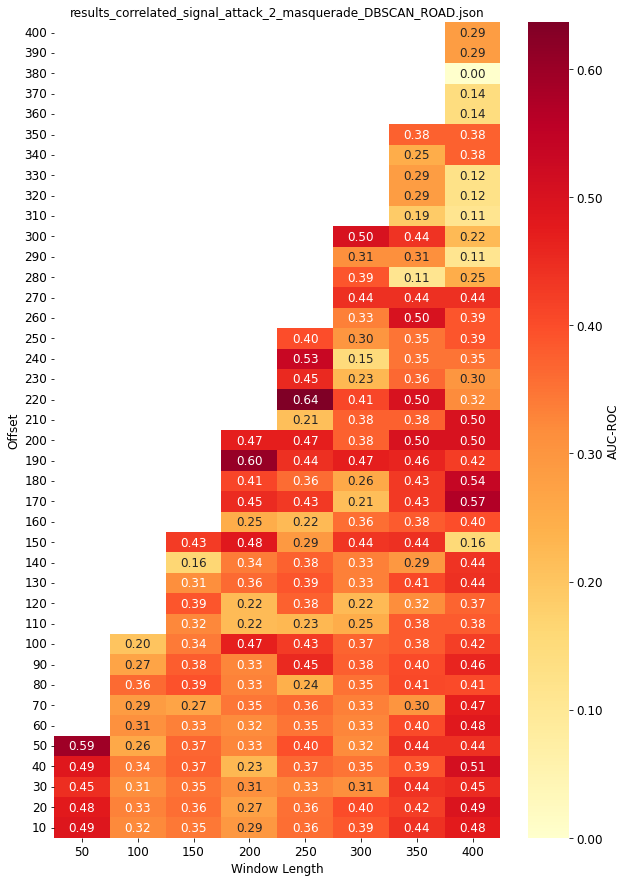

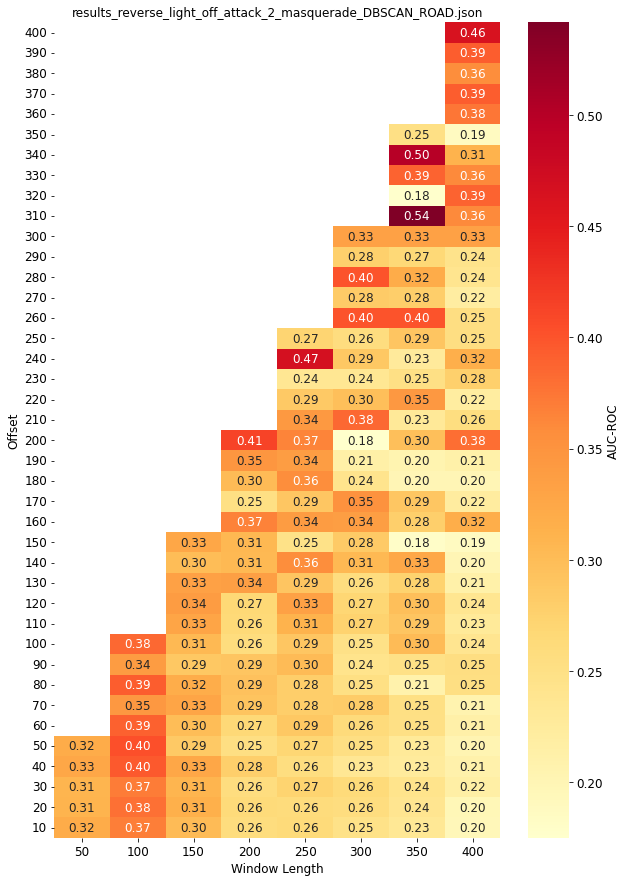

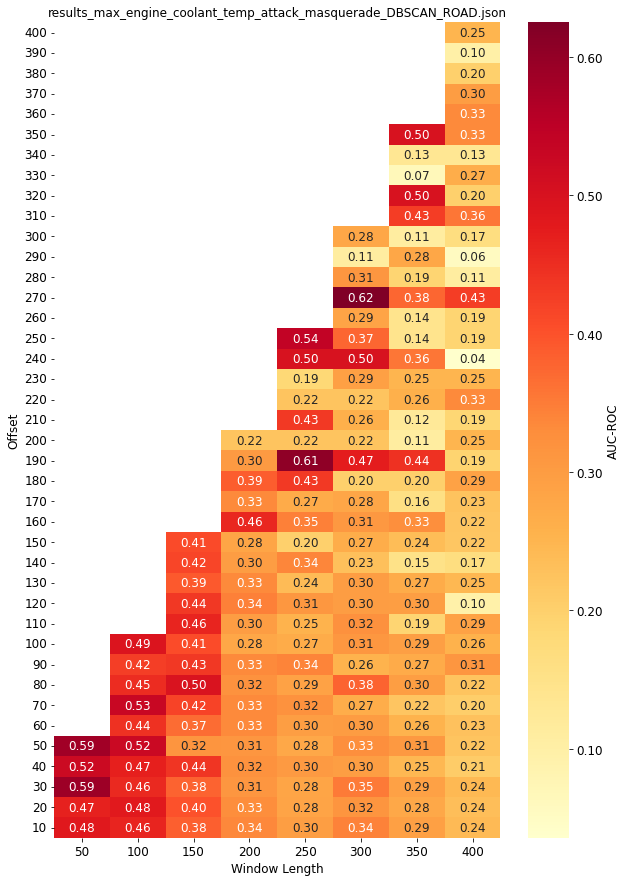

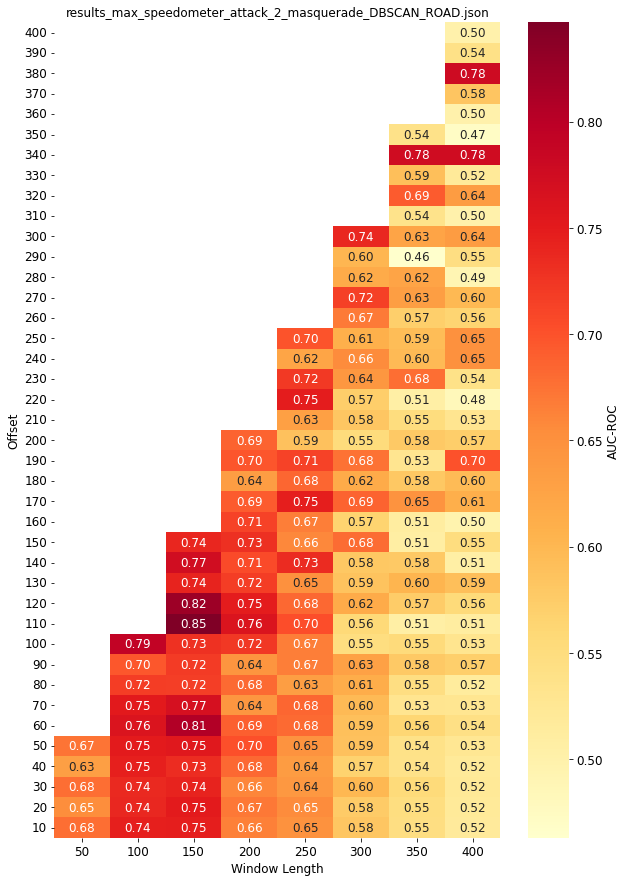

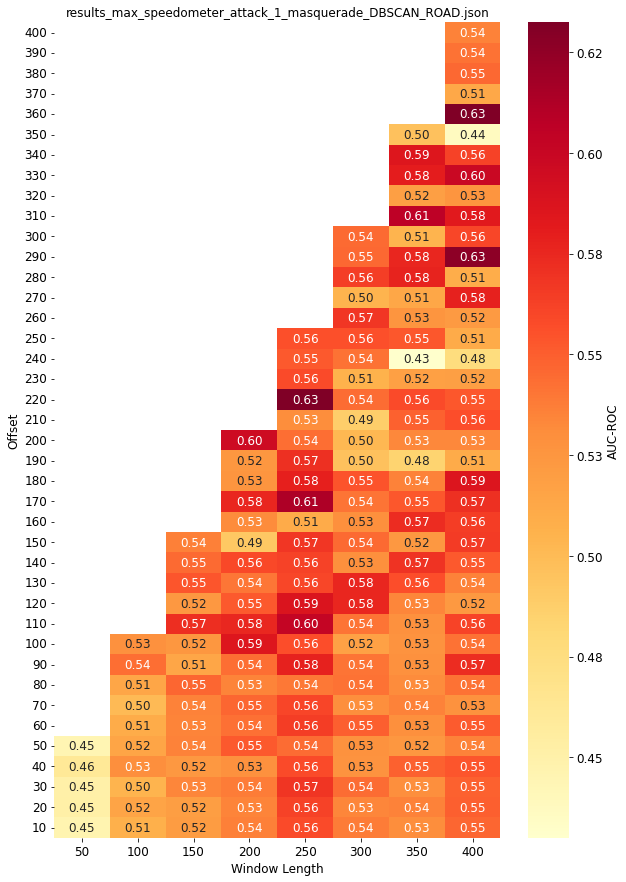

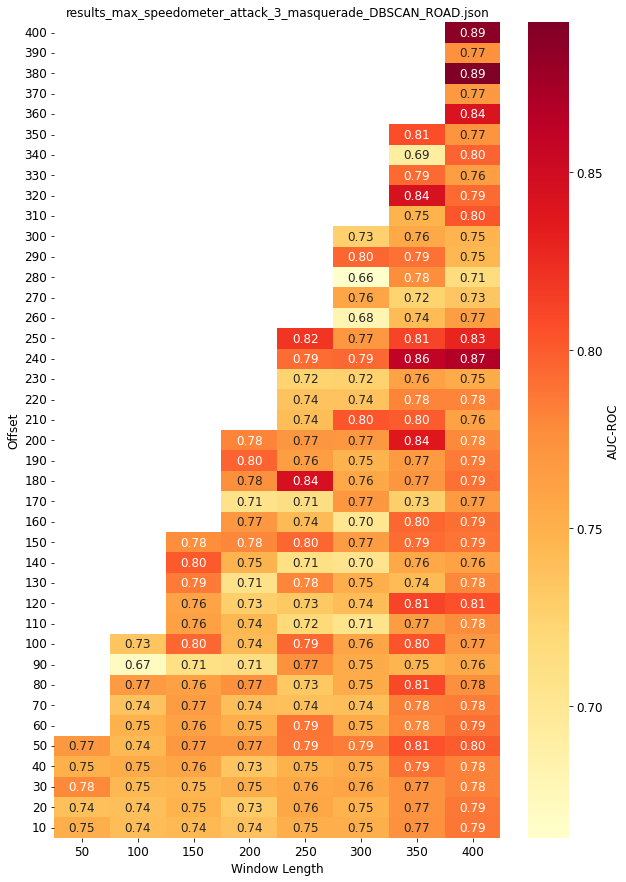

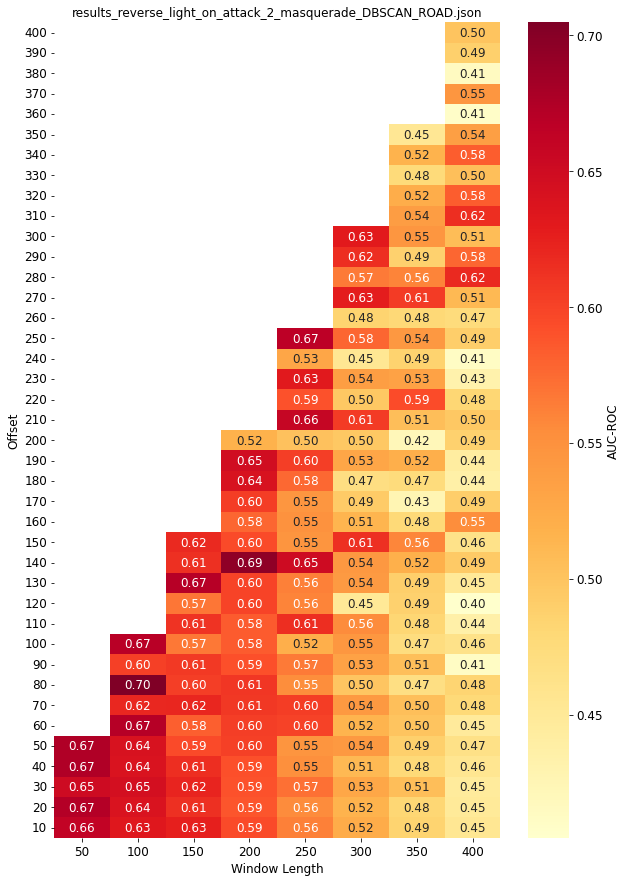

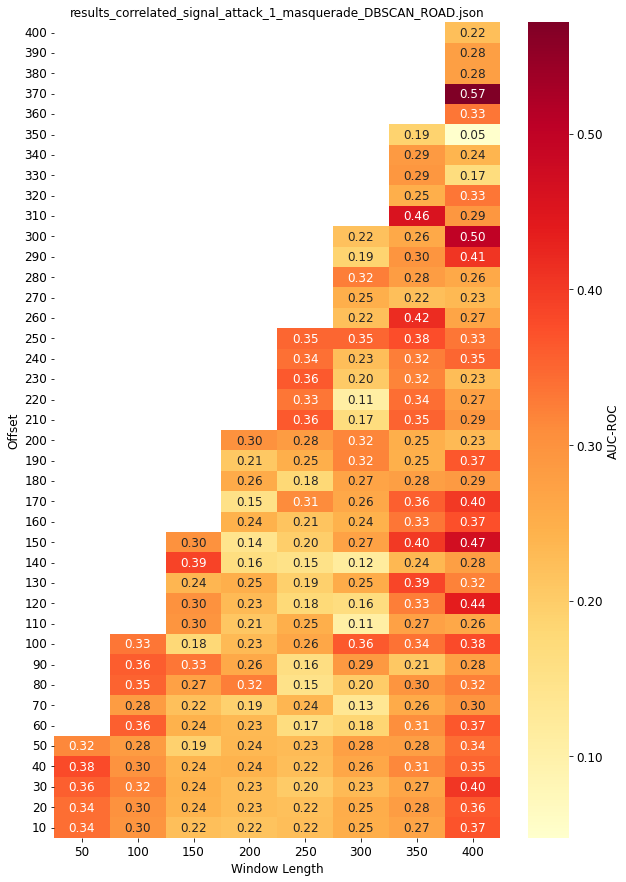

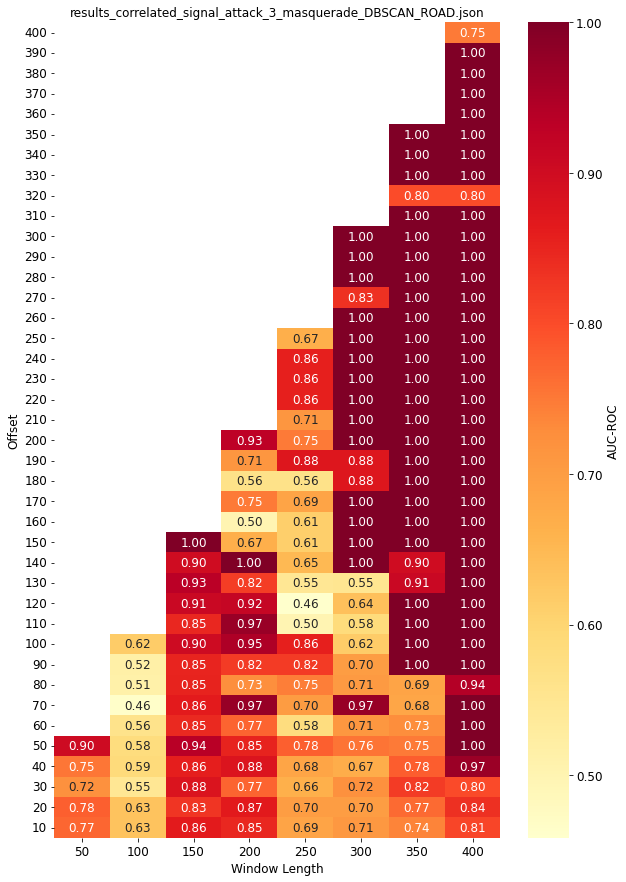

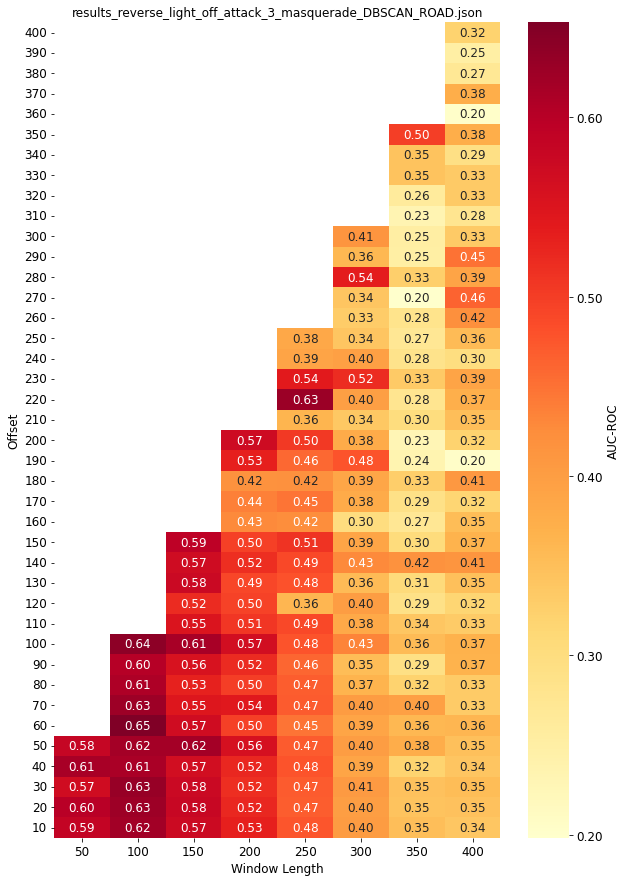

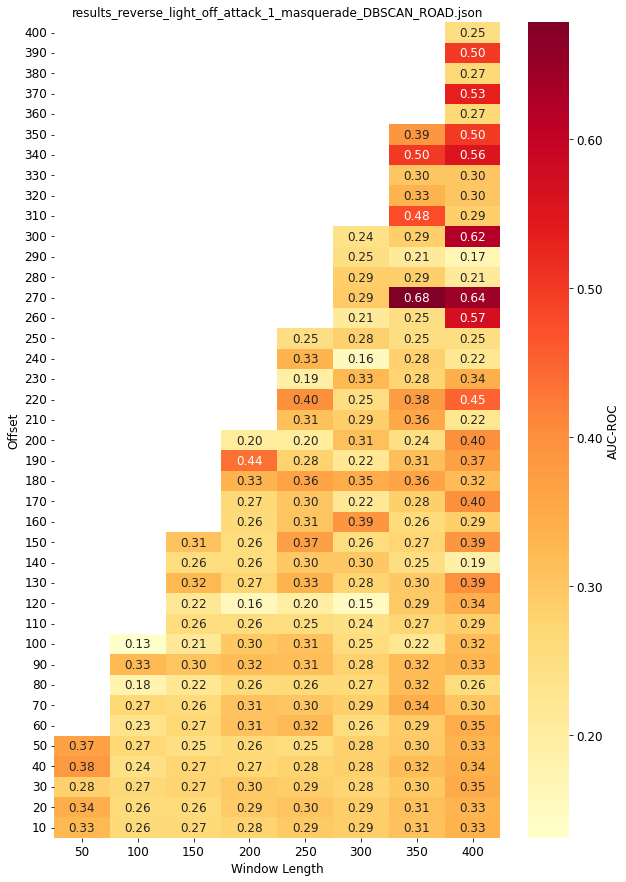

In [13]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by AHC Method

In [3]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_AHC_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_max_speedometer_attack_1_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_2_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_3_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_2_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json']


results_max_speedometer_attack_1_masquerade_AHC_ROAD.json
results_max_speedometer_attack_2_masquerade_AHC_ROAD.json
results_max_speedometer_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json
results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json
results_correlated_signal_attack_1_masquerade_AHC_ROAD.json
results_correlated_signal_attack_3_masquerade_AHC_ROAD.json
results_correlated_signal_attack_2_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json
results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json
results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json


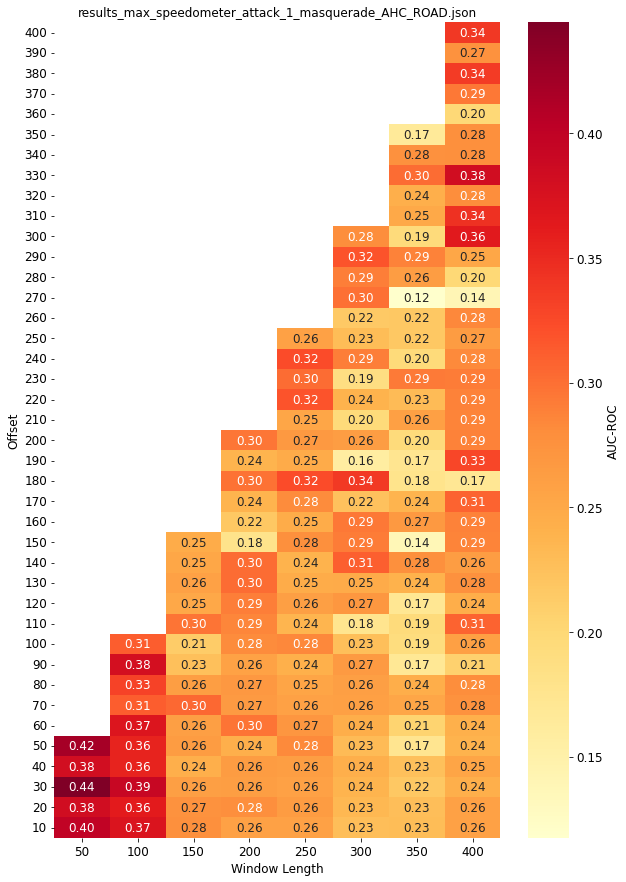

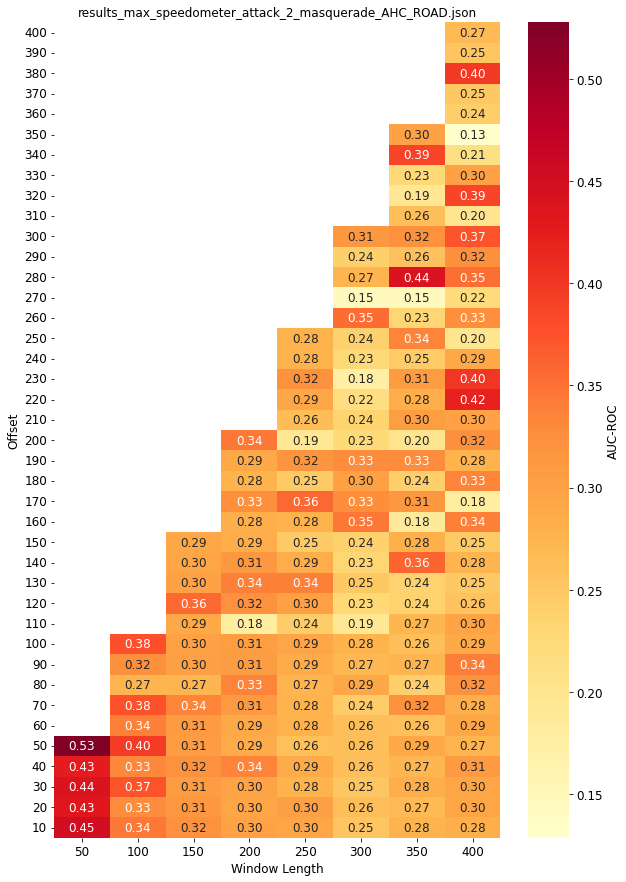

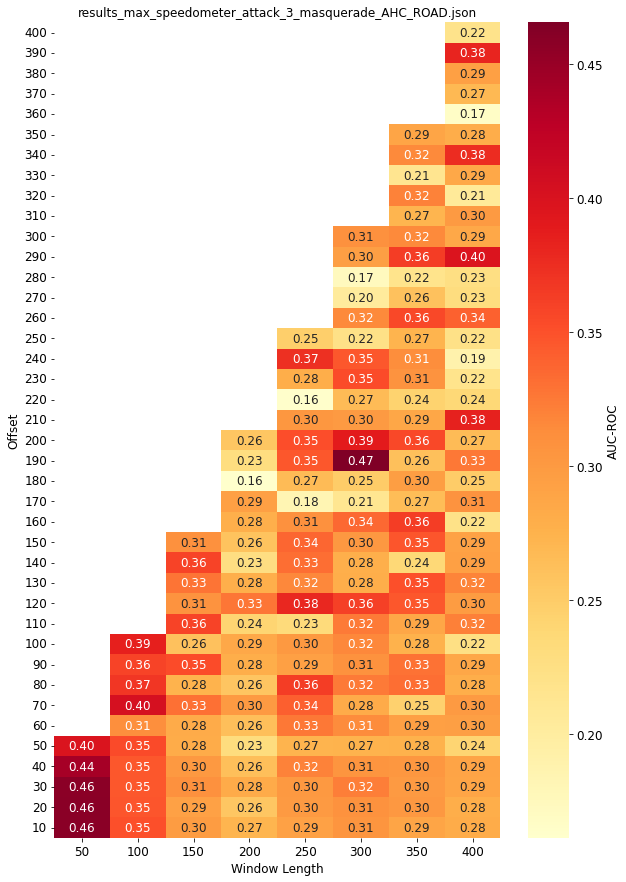

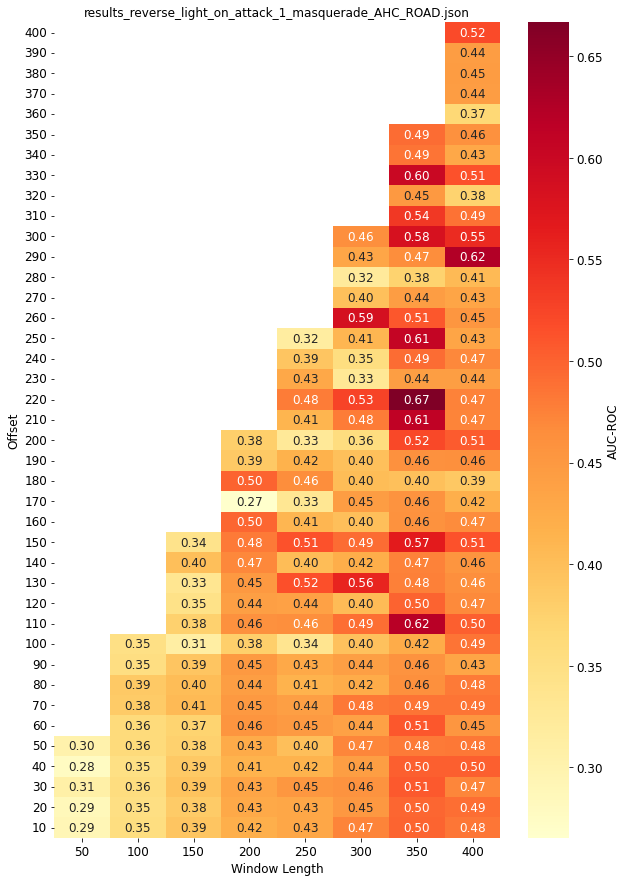

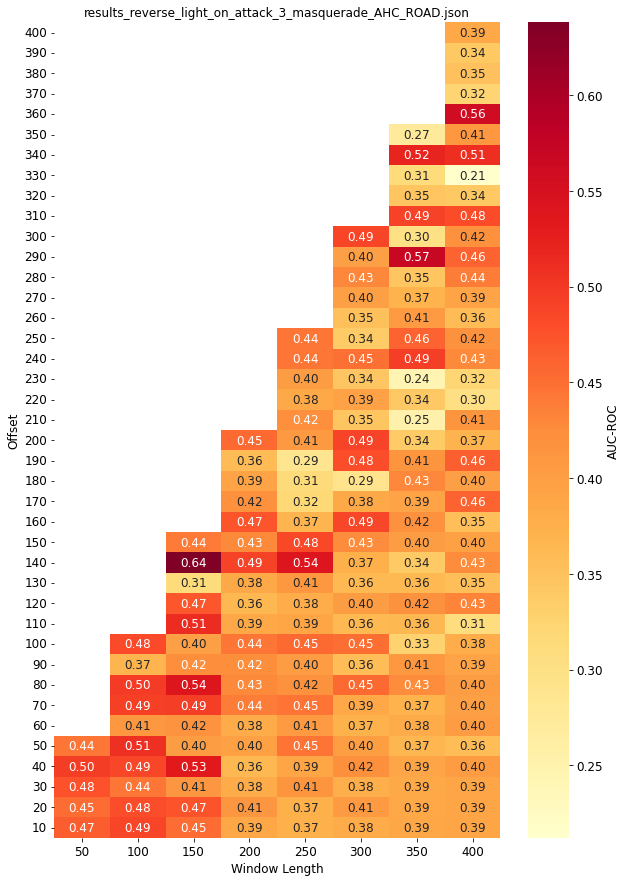

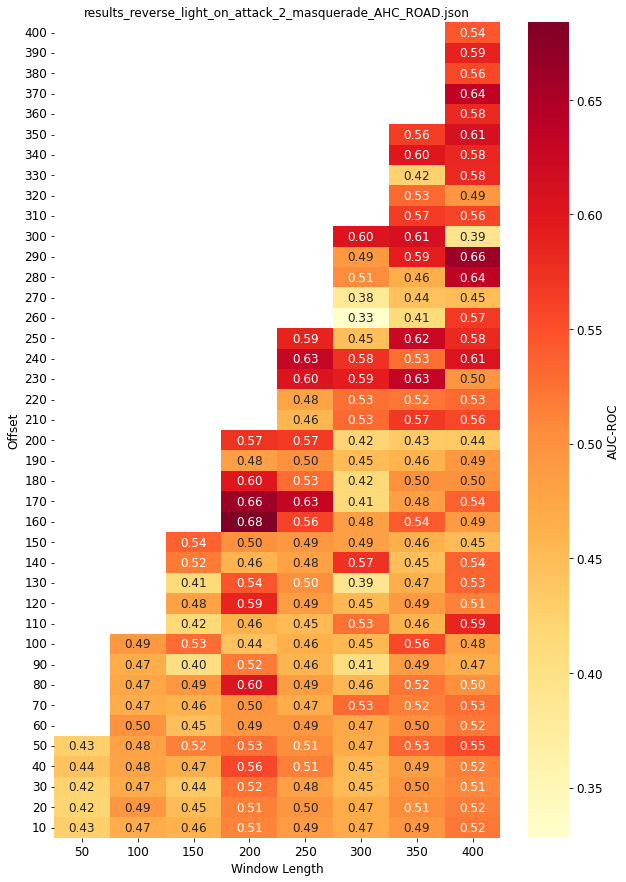

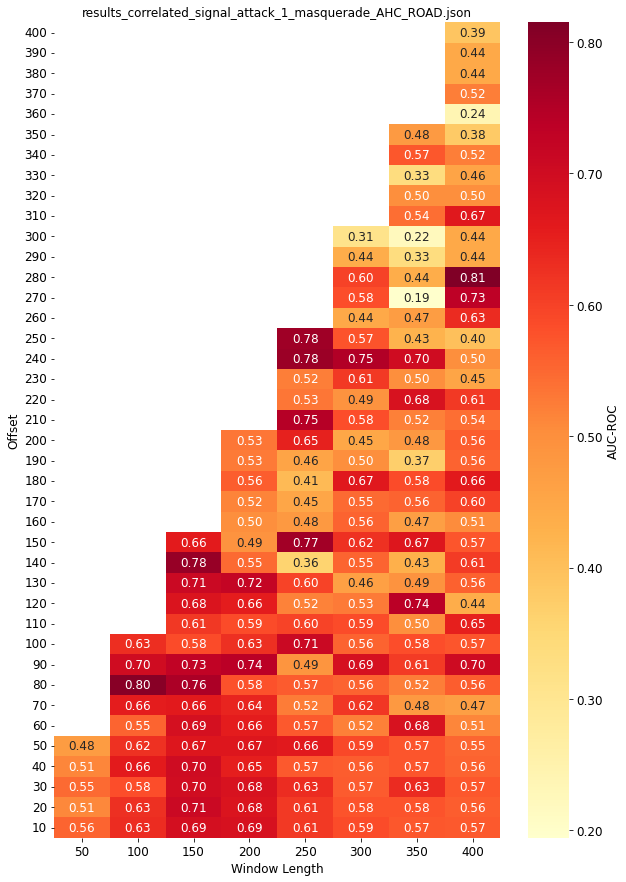

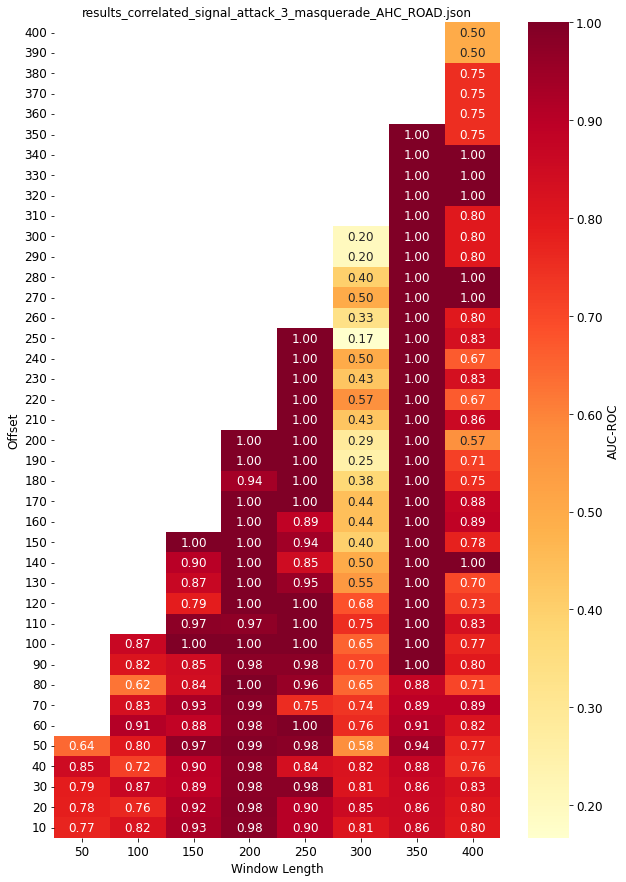

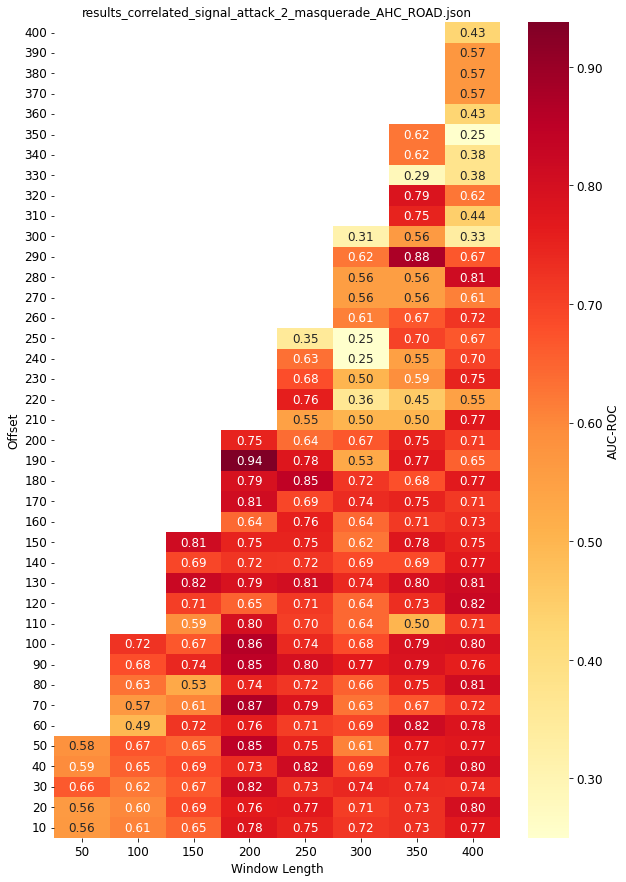

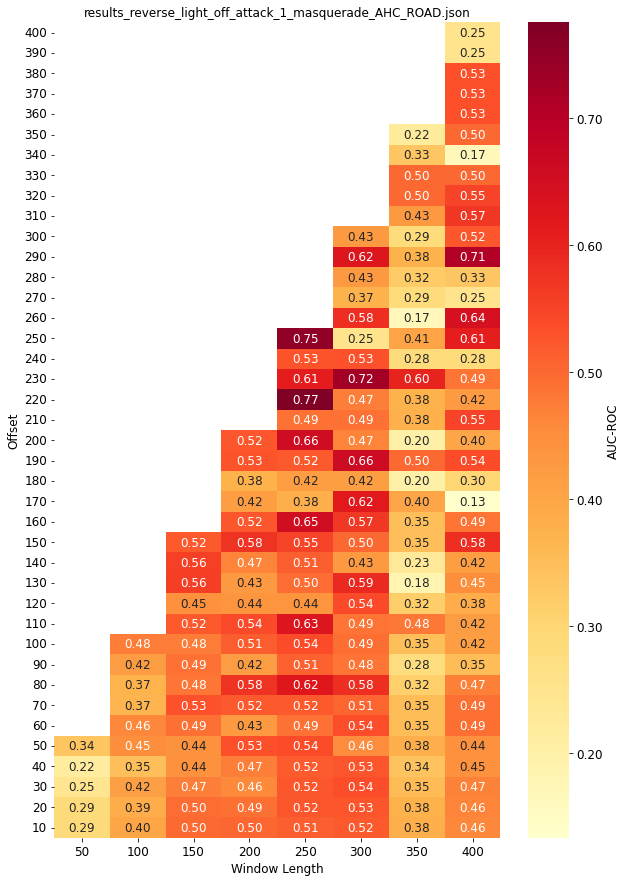

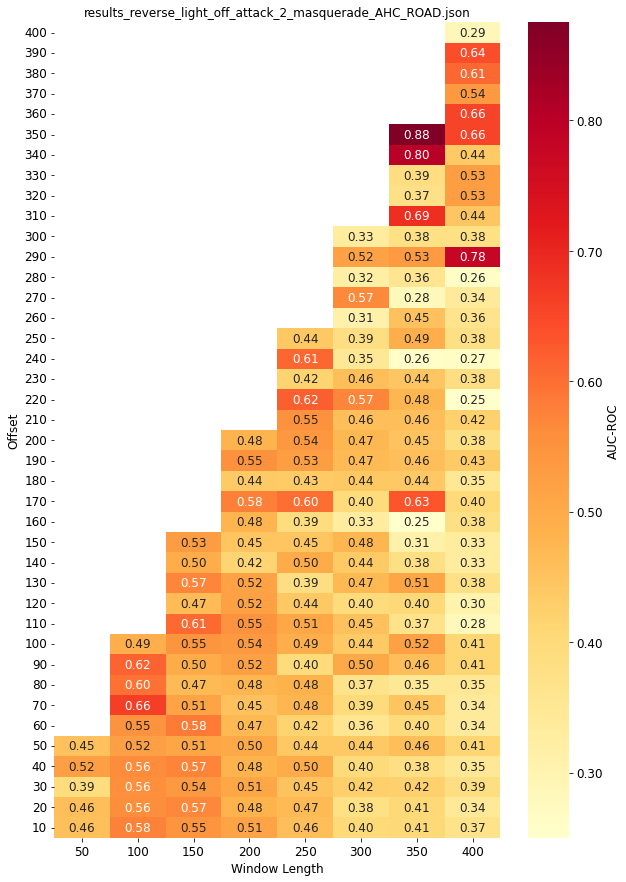

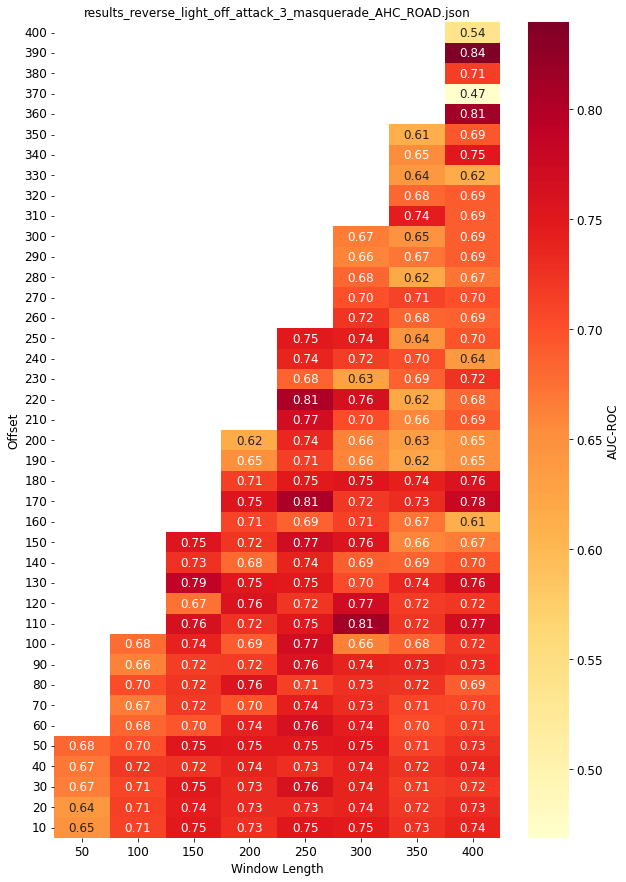

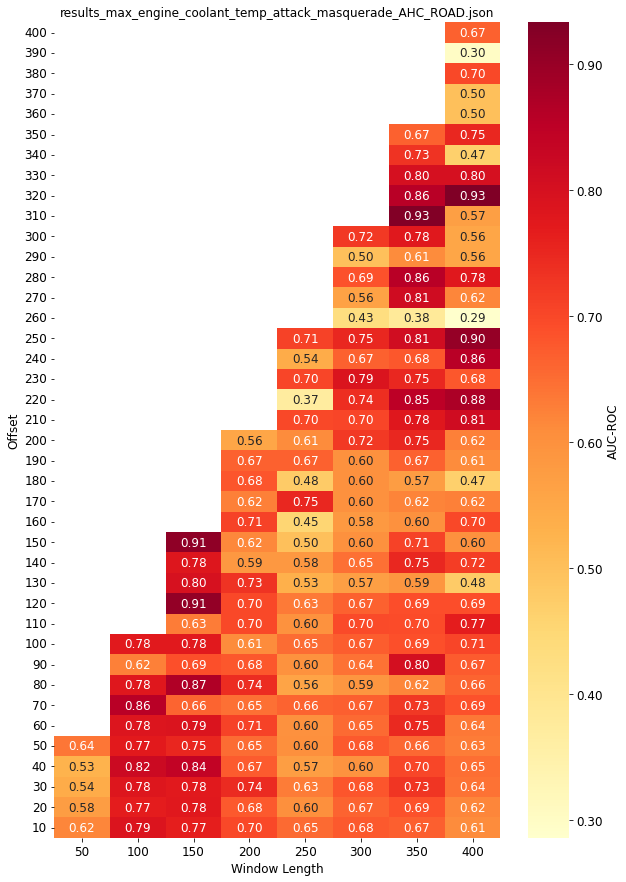

In [4]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)